## Assignment: Advanced Regression

<h2>Business Objective(s)</h2>

**The company wants to know:**
  - Which variables are significant in predicting the price of a house, and
  - How well those variables describe the price of a house.

**Technical goal**
  - Determine the optimal value of lambda for ridge and lasso regression

<h3>Business Goal</h3>
    You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [109]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import linear_model
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from enum import Enum, auto
from typing import Sequence, Tuple
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score

# plotting 
import matplotlib.pyplot as plt
import seaborn as sns

# render matplotlib graphs inline
%matplotlib inline

# import display function
from IPython.display import display

# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

In [110]:
pd.options.display.max_columns = None
pd.options.display.width = None
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

<h3>Data Load</h3>

In [111]:
df = pd.read_csv("train.csv")

In [112]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [114]:
df.describe().T

count        mean        std      min        25%       50%  \
Id             1460.0     730.500    421.610      1.0     365.75     730.5   
MSSubClass     1460.0      56.897     42.301     20.0      20.00      50.0   
LotFrontage    1201.0      70.050     24.285     21.0      59.00      69.0   
LotArea        1460.0   10516.828   9981.265   1300.0    7553.50    9478.5   
OverallQual    1460.0       6.099      1.383      1.0       5.00       6.0   
OverallCond    1460.0       5.575      1.113      1.0       5.00       5.0   
YearBuilt      1460.0    1971.268     30.203   1872.0    1954.00    1973.0   
YearRemodAdd   1460.0    1984.866     20.645   1950.0    1967.00    1994.0   
MasVnrArea     1452.0     103.685    181.066      0.0       0.00       0.0   
BsmtFinSF1     1460.0     443.640    456.098      0.0       0.00     383.5   
BsmtFinSF2     1460.0      46.549    161.319      0.0       0.00       0.0   
BsmtUnfSF      1460.0     567.240    441.867      0.0     223.00     477.5   
TotalBsmtSF    1460.0    1057.429    438.705      0.0     795.75     991.5   
1stFlrSF       1460.0    1162.627    386.588    334.0     882.00    1087.0   
2ndFlrSF       1460.0     346.992    436.528      0.0       0.00       0.0   
LowQualFinSF   1460.0       5.845     48.623      0.0       0.00       0.0   
GrLivArea      1460.0    1515.464    525.480    334.0    1129.50    1464.0   
BsmtFullBath   1460.0       0.425      0.519      0.0       0.00       0.0   
BsmtHalfBath   1460.0       0.058      0.239      0.0       0.00       0.0   
FullBath       1460.0       1.565      0.551      0.0       1.00       2.0   
HalfBath       1460.0       0.383      0.503      0.0       0.00       0.0   
BedroomAbvGr   1460.0       2.866      0.816      0.0       2.00       3.0   
KitchenAbvGr   1460.0       1.047      0.220      0.0       1.00       1.0   
TotRmsAbvGrd   1460.0       6.518      1.625      2.0       5.00       6.0   
Fireplaces     1460.0       0.613      0.645      0.0       0.00       1.0   
GarageYrBlt    1379.0    1978.506     24.690   1900.0    1961.00    1980.0   
GarageCars     1460.0       1.767      0.747      0.0       1.00       2.0   
GarageArea     1460.0     472.980    213.805      0.0     334.50     480.0   
WoodDeckSF     1460.0      94.245    125.339      0.0       0.00       0.0   
OpenPorchSF    1460.0      46.660     66.256      0.0       0.00      25.0   
EnclosedPorch  1460.0      21.954     61.119      0.0       0.00       0.0   
3SsnPorch      1460.0       3.410     29.317      0.0       0.00       0.0   
ScreenPorch    1460.0      15.061     55.757      0.0       0.00       0.0   
PoolArea       1460.0       2.759     40.177      0.0       0.00       0.0   
MiscVal        1460.0      43.489    496.123      0.0       0.00       0.0   
MoSold         1460.0       6.322      2.704      1.0       5.00       6.0   
YrSold         1460.0    2007.816      1.328   2006.0    2007.00    2008.0   
SalePrice      1460.0  180921.196  79442.503  34900.0  129975.00  163000.0   

                     75%       max  
Id               1095.25    1460.0  
MSSubClass         70.00     190.0  
LotFrontage        80.00     313.0  
LotArea         11601.50  215245.0  
OverallQual         7.00      10.0  
OverallCond         6.00       9.0  
YearBuilt        2000.00    2010.0  
YearRemodAdd     2004.00    2010.0  
MasVnrArea        166.00    1600.0  
BsmtFinSF1        712.25    5644.0  
BsmtFinSF2          0.00    1474.0  
BsmtUnfSF         808.00    2336.0  
TotalBsmtSF      1298.25    6110.0  
1stFlrSF         1391.25    4692.0  
2ndFlrSF          728.00    2065.0  
LowQualFinSF        0.00     572.0  
GrLivArea        1776.75    5642.0  
BsmtFullBath        1.00       3.0  
BsmtHalfBath        0.00       2.0  
FullBath            2.00       3.0  
HalfBath            1.00       2.0  
BedroomAbvGr        3.00       8.0  
KitchenAbvGr        1.00       3.0  
TotRmsAbvGrd        7.00      14.0  
Fireplaces          1.00       3.0  
GarageYrBlt

In [115]:
df.describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.95, 0.99]).T

count        mean        std      min        5%       10%  \
Id             1460.0     730.500    421.610      1.0     73.95     146.9   
MSSubClass     1460.0      56.897     42.301     20.0     20.00      20.0   
LotFrontage    1201.0      70.050     24.285     21.0     34.00      44.0   
LotArea        1460.0   10516.828   9981.265   1300.0   3311.70    5000.0   
OverallQual    1460.0       6.099      1.383      1.0      4.00       5.0   
OverallCond    1460.0       5.575      1.113      1.0      4.00       5.0   
YearBuilt      1460.0    1971.268     30.203   1872.0   1916.00    1924.9   
YearRemodAdd   1460.0    1984.866     20.645   1950.0   1950.00    1950.0   
MasVnrArea     1452.0     103.685    181.066      0.0      0.00       0.0   
BsmtFinSF1     1460.0     443.640    456.098      0.0      0.00       0.0   
BsmtFinSF2     1460.0      46.549    161.319      0.0      0.00       0.0   
BsmtUnfSF      1460.0     567.240    441.867      0.0      0.00      74.9   
TotalBsmtSF    1460.0    1057.429    438.705      0.0    519.30     636.9   
1stFlrSF       1460.0    1162.627    386.588    334.0    672.95     756.9   
2ndFlrSF       1460.0     346.992    436.528      0.0      0.00       0.0   
LowQualFinSF   1460.0       5.845     48.623      0.0      0.00       0.0   
GrLivArea      1460.0    1515.464    525.480    334.0    848.00     912.0   
BsmtFullBath   1460.0       0.425      0.519      0.0      0.00       0.0   
BsmtHalfBath   1460.0       0.058      0.239      0.0      0.00       0.0   
FullBath       1460.0       1.565      0.551      0.0      1.00       1.0   
HalfBath       1460.0       0.383      0.503      0.0      0.00       0.0   
BedroomAbvGr   1460.0       2.866      0.816      0.0      2.00       2.0   
KitchenAbvGr   1460.0       1.047      0.220      0.0      1.00       1.0   
TotRmsAbvGrd   1460.0       6.518      1.625      2.0      4.00       5.0   
Fireplaces     1460.0       0.613      0.645      0.0      0.00       0.0   
GarageYrBlt    1379.0    1978.506     24.690   1900.0   1930.00    1945.0   
GarageCars     1460.0       1.767      0.747      0.0      0.00       1.0   
GarageArea     1460.0     472.980    213.805      0.0      0.00     240.0   
WoodDeckSF     1460.0      94.245    125.339      0.0      0.00       0.0   
OpenPorchSF    1460.0      46.660     66.256      0.0      0.00       0.0   
EnclosedPorch  1460.0      21.954     61.119      0.0      0.00       0.0   
3SsnPorch      1460.0       3.410     29.317      0.0      0.00       0.0   
ScreenPorch    1460.0      15.061     55.757      0.0      0.00       0.0   
PoolArea       1460.0       2.759     40.177      0.0      0.00       0.0   
MiscVal        1460.0      43.489    496.123      0.0      0.00       0.0   
MoSold         1460.0       6.322      2.704      1.0      2.00       3.0   
YrSold         1460.0    2007.816      1.328   2006.0   2006.00    2006.0   
SalePrice      1460.0  180921.196  79442.503  34900.0  88000.00  106475.0   

                     25%       50%        75%        95%        99%       max  
Id                365.75     730.5    1095.25    1387.05    1445.41    1460.0  
MSSubClass         20.00      50.0      70.00     160.00     190.00     190.0  
LotFrontage        59.00      69.0      80.00     107.00     141.00     313.0  
LotArea          7553.50    9478.5   11601.50   17401.15   37567.64  215245.0  
OverallQual         5.00       6.0       7.00       8.00      10.00      10.0  
OverallCond         5.00       5.0       6.00       8.00       9.00       9.0  
YearBuilt        1954.00    1973.0    2000.00    2007.00    2009.00    2010.0  
YearRemodAdd     1967.00    1994.0    2004.00    2007.00    2009.00    2010.0  
MasVnrArea          0.00       0.0     166.00     456.00     791.92    1600.0  
BsmtFinSF1          0.00     383.5     712.25    1274.00    1572.41    5644.0  
BsmtFinSF2          0.00       0.0       0.00     396.20     830.38    1474.0  
BsmtUnfSF         223.00     477.5     808.00    146

In [116]:
df.shape

(1460, 81)

<h3>SalePrice Analysis</h3>

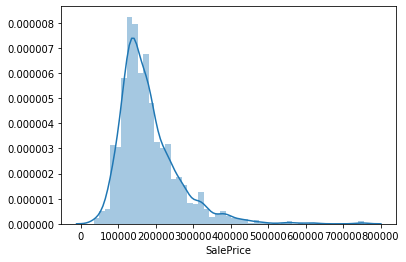

In [117]:
sns.distplot(df['SalePrice'])
plt.show()

It seems there are some outliers, we need to analyze

In [118]:
df.drop('Id', axis=1, inplace=True)
print(df.shape)

(1460, 80)


In [119]:
# Column wise Null percentage
nullcheck = round((df.isna().sum()[df.isna().sum() > 0]/df.shape[0])*100, 2).sort_values(ascending=False)
nullcheck

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

**Total 4 columns have more than 80% blank values, so we'll drop them**

In [120]:
df.drop(['PoolQC','MiscFeature','Alley','Fence'], axis=1, inplace=True)
print(df.shape)

(1460, 76)


#### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

In [121]:
# Categorical columns
cat_cols = ["MSSubClass", "MSZoning",
            "Street",
            "LotShape",
            "LandContour",
            "Utilities",
            "LotConfig",
            "LandSlope",
            "Neighborhood",
            "Condition1",
            "Condition2",
            "BldgType",
            "HouseStyle",
            "OverallQual",
            "OverallCond",
            "RoofStyle",
            "RoofMatl",
            "Exterior1st",
            "Exterior2nd",
            "MasVnrType",
            "ExterQual",
            "ExterCond",
            "Foundation",
            "BsmtQual",
            "BsmtCond",
            "BsmtExposure",
            "BsmtFinType1",
            "BsmtFinType2",
            "Heating",
            "HeatingQC",
            "CentralAir",
            "Electrical",
            "KitchenQual",
            "Functional",
            "FireplaceQu",
            "GarageType",
            "GarageFinish",
            "GarageQual",
            "GarageCond",
            "PavedDrive",
            "SaleType",
            "SaleCondition"]

# Need some extra investigation
explr_cols = ["BsmtFullBath",
              "BsmtHalfBath",
              "FullBath",
              "HalfBath",
              "Bedroom",
              "Kitchen",
              "TotRmsAbvGrd",
              "Fireplaces",
              "GarageCars"]

# We'll extract age from these
age_cols = ["YearBuilt",
            "YearRemodAdd",
            "GarageYrBlt",
            "YrSold"]

# Numerical Columns
num_cols = ["LotFrontage", "LotArea", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF",
            "LowQualFinSF", "GrLivArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "SalePrice"]



<Figure size 1440x720 with 0 Axes>

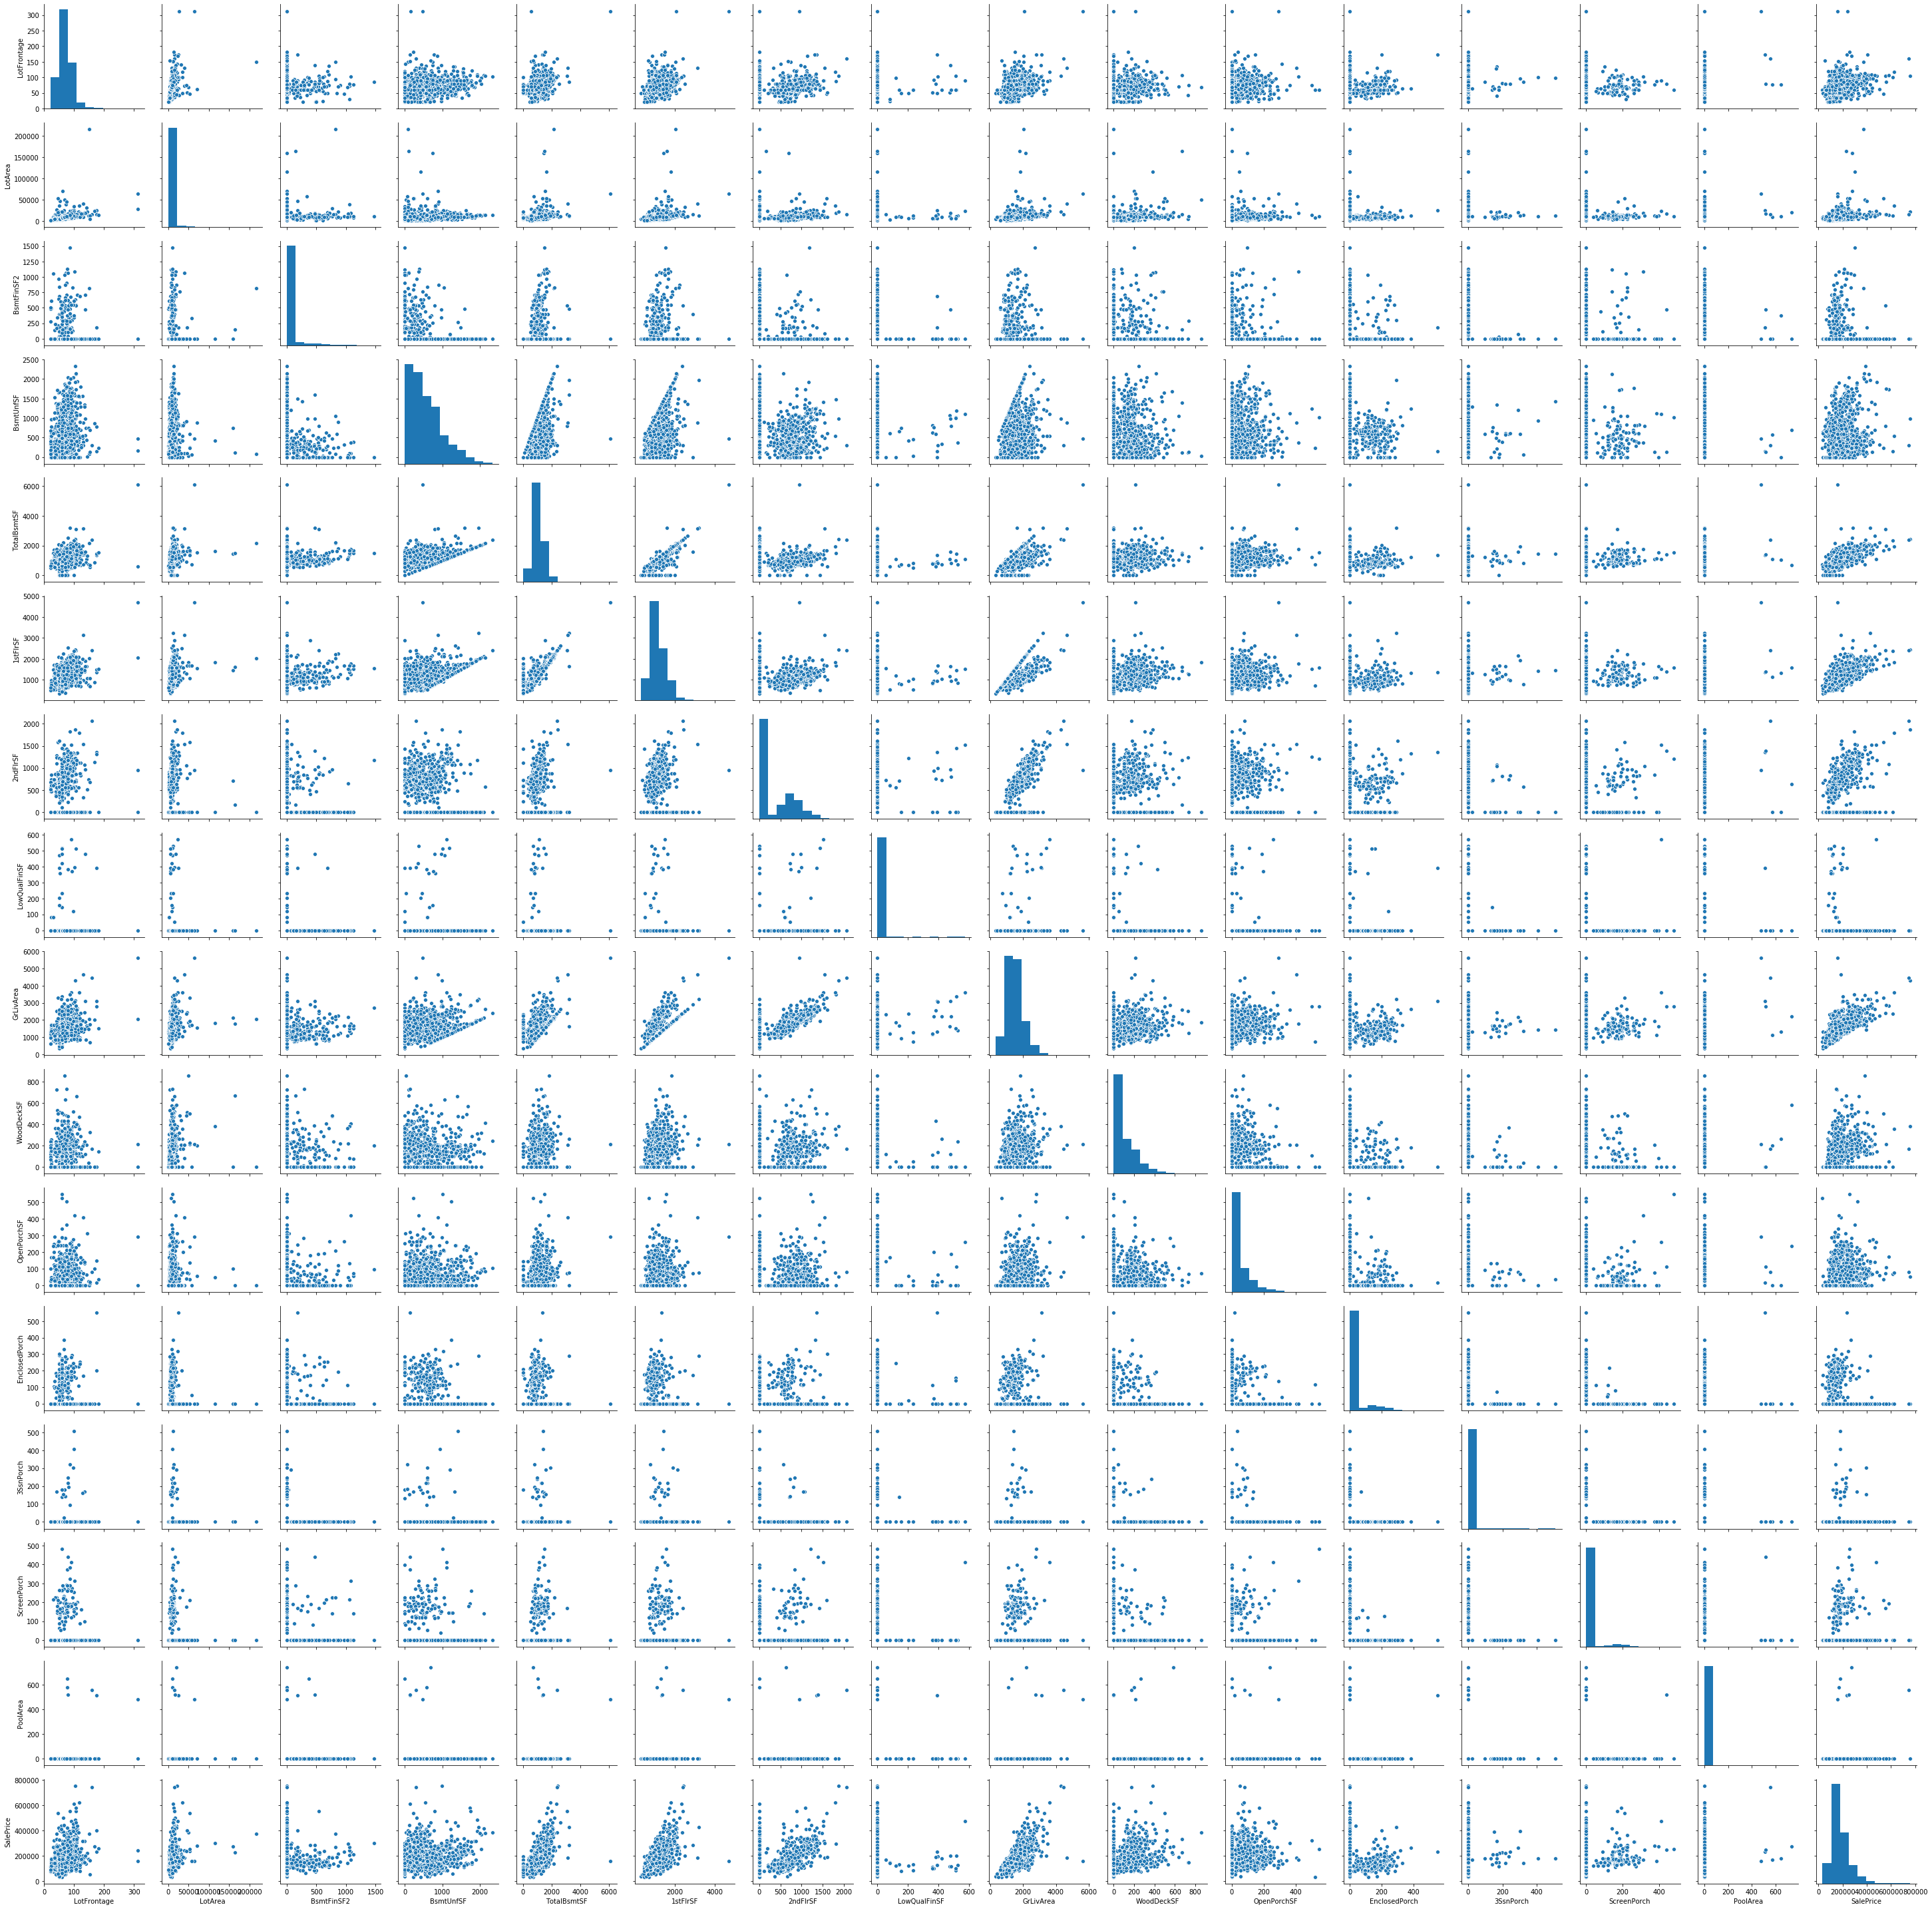

In [122]:
house_num = df[num_cols]
plt.figure(figsize=(20, 10))
sns.pairplot(house_num)
plt.show()

In [123]:
# correlation matrix
cor = house_num.corr()
cor

LotFrontage  LotArea  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
LotFrontage          1.000    0.426       0.050      0.133        0.392   
LotArea              0.426    1.000       0.111     -0.003        0.261   
BsmtFinSF2           0.050    0.111       1.000     -0.209        0.105   
BsmtUnfSF            0.133   -0.003      -0.209      1.000        0.415   
TotalBsmtSF          0.392    0.261       0.105      0.415        1.000   
1stFlrSF             0.457    0.299       0.097      0.318        0.820   
2ndFlrSF             0.080    0.051      -0.099      0.004       -0.175   
LowQualFinSF         0.038    0.005       0.015      0.028       -0.033   
GrLivArea            0.403    0.263      -0.010      0.240        0.455   
WoodDeckSF           0.089    0.172       0.068     -0.005        0.232   
OpenPorchSF          0.152    0.085       0.003      0.129        0.247   
EnclosedPorch        0.011   -0.018       0.037     -0.003       -0.095   
3SsnPorch            0.070    0.020      -0.030      0.021        0.037   
ScreenPorch          0.041    0.043       0.089     -0.013        0.084   
PoolArea             0.206    0.078       0.042     -0.035        0.126   
SalePrice            0.352    0.264      -0.011      0.214        0.614   

               1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  WoodDeckSF  \
LotFrontage       0.457     0.080         0.038      0.403       0.089   
LotArea           0.299     0.051         0.005      0.263       0.172   
BsmtFinSF2        0.097    -0.099         0.015     -0.010       0.068   
BsmtUnfSF         0.318     0.004         0.028      0.240      -0.005   
TotalBsmtSF       0.820    -0.175        -0.033      0.455       0.232   
1stFlrSF          1.000    -0.203        -0.014      0.566       0.235   
2ndFlrSF         -0.203     1.000         0.063      0.688       0.092   
LowQualFinSF     -0.014     0.063         1.000      0.135      -0.025   
GrLivArea         0.566     0.688         0.135      1.000       0.247   
WoodDeckSF        0.235     0.092        -0.025      0.247       1.000   
OpenPorchSF       0.212     0.208         0.018      0.330       0.059   
EnclosedPorch    -0.065     0.062         0.061      0.009      -0.126   
3SsnPorch         0.056    -0.024        -0.004      0.021      -0.033   
ScreenPorch       0.089     0.041         0.027      0.102      -0.074   
PoolArea          0.132     0.081         0.062      0.170       0.073   
SalePrice         0.606     0.319        -0.026      0.709       0.324   

               OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
LotFrontage          0.152          0.011      0.070        0.041     0.206   
LotArea              0.085         -0.018      0.020        0.043     0.078   
BsmtFinSF2           0.003          0.037     -0.030        0.089     0.042   
BsmtUnfSF            0.129         -0.003      0.021       -0.013    -0.035   
TotalBsmtSF          0.247         -0.095      0.037        0.084     0.126   
1stFlrSF             0.212         -0.065      0.056        0.089     0.132   
2ndFlrSF             0.208          0.062     -0.024        0.041     0.081   
LowQualFinSF         0.018          0.061     -0.004        0.027     0.062   
GrLivArea            0.330          0.009      0.021        0.102     0.170   
WoodDeckSF           0.059         -0.126     -0.033       -0.074     0.073   
OpenPorchSF          1.000         -0.093     -0.006        0.074     0.061   
EnclosedPorch       -0.093          1.000     -0.037       -0.083     0.054   
3SsnPorch           -0.006         -0.037      1.000       -0.031    -0.008   
ScreenPorch          0.074         -0.083     -0.031        1.000     0.051   
PoolArea             0.061          0.054     -0.008        0.051     1.000   
SalePrice            0.316         -0.129      0.045        0.111     0.092   

               SalePrice  
LotFrontage        0.352  
LotArea            0.264  
BsmtFinSF2        -0.011  
BsmtUnfSF          0.214  
T

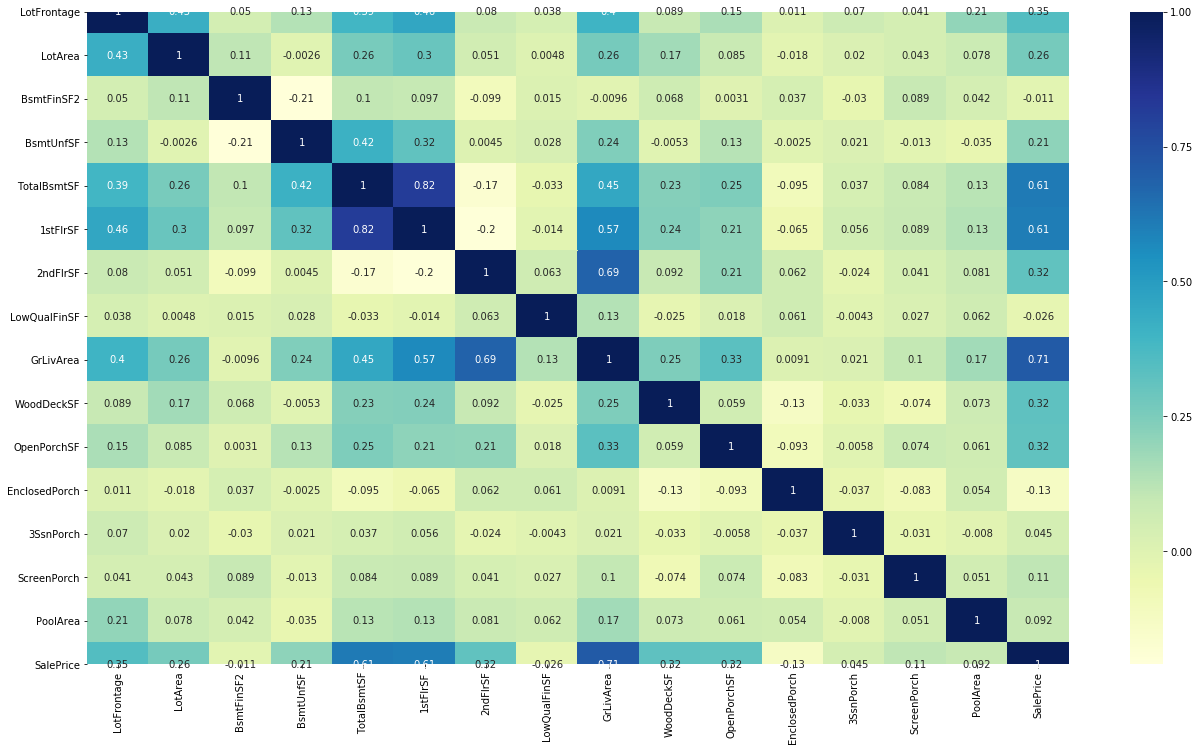

In [124]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(22,12))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

The heatmap shows some useful insights:

Correlation of price with independent variables:
- SalePrice is positively correlated with GrLivArea, TotalBsmtSF, 1stFlrSF
- Price is negatively correlated to ```LowQualFinSF``` and ```BsmtFinSF2``` and ```EnclosedPorch``` 

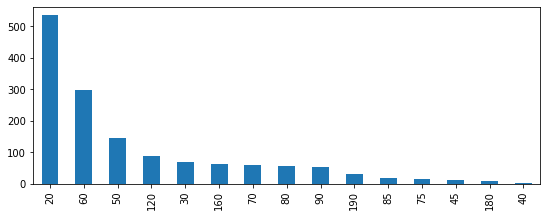

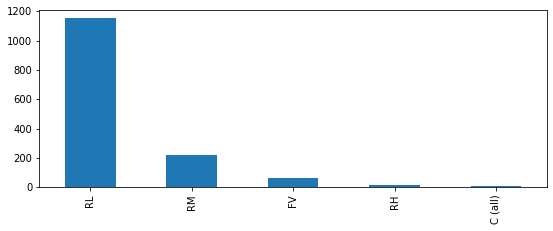

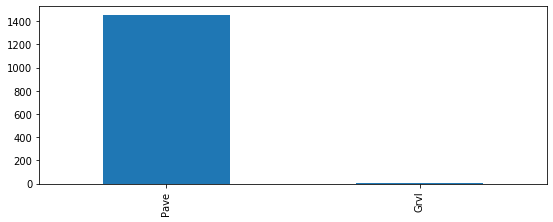

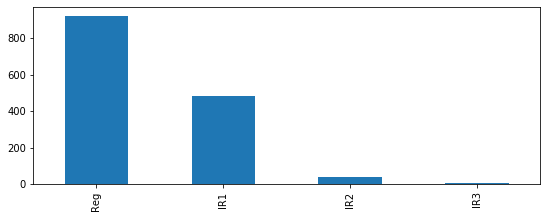

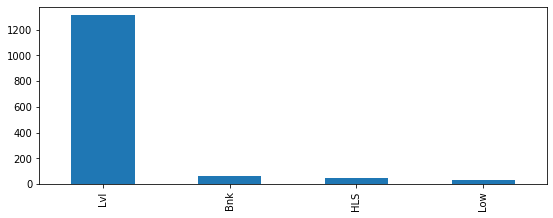

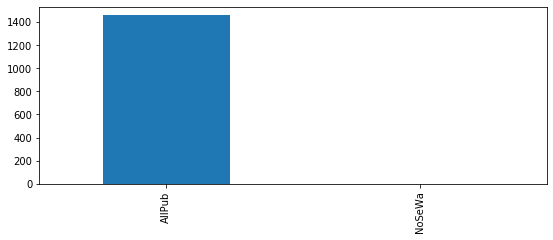

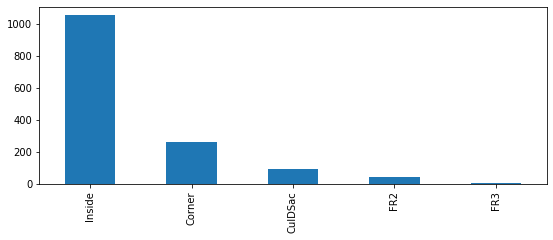

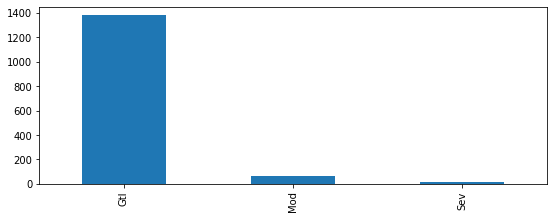

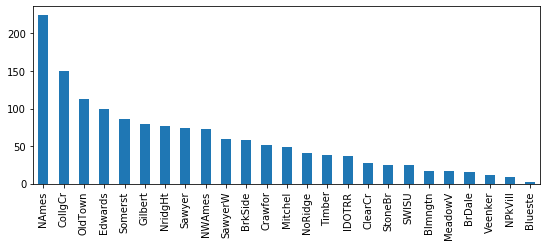

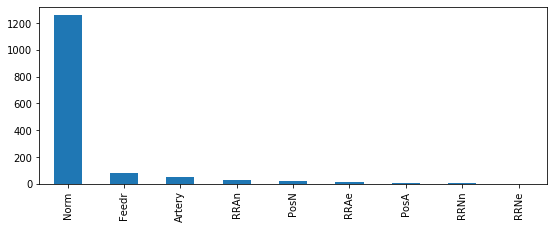

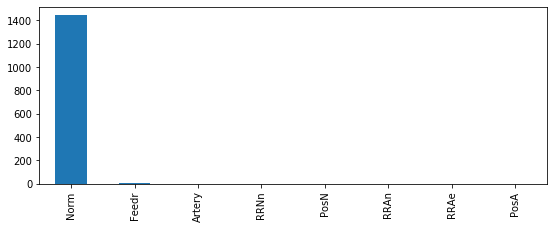

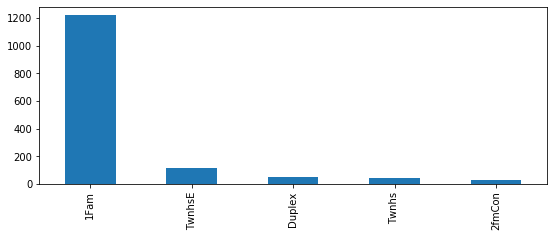

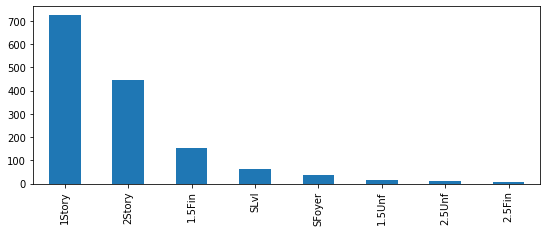

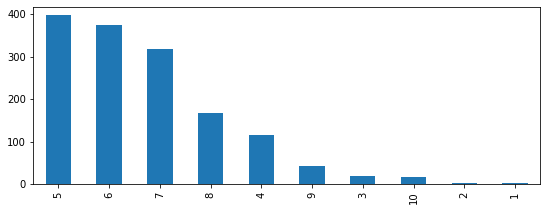

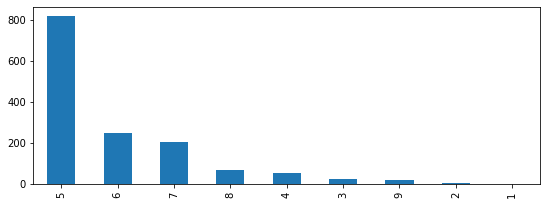

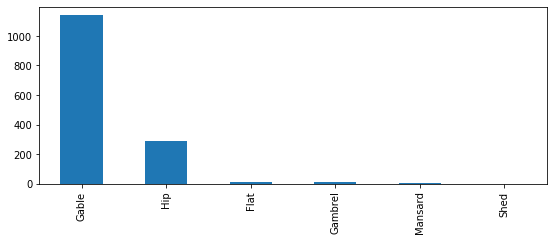

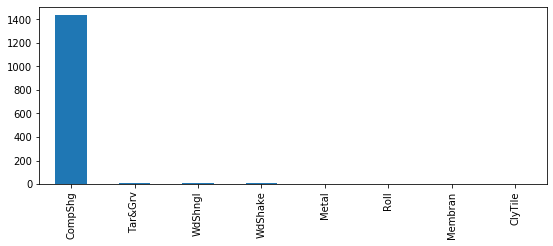

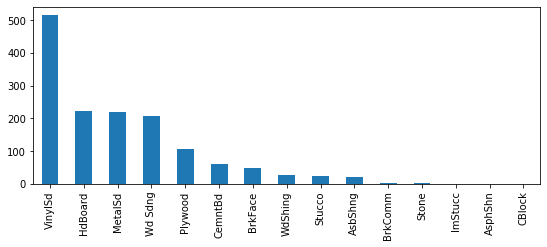

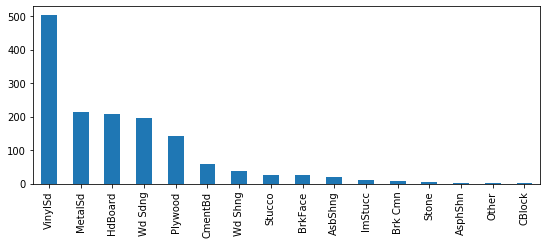

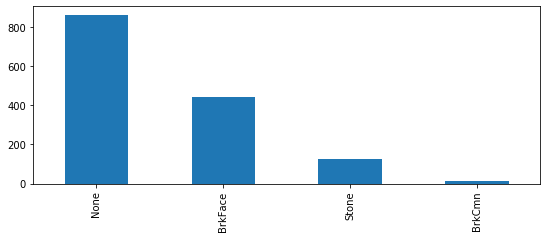

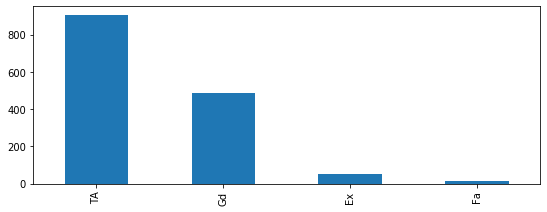

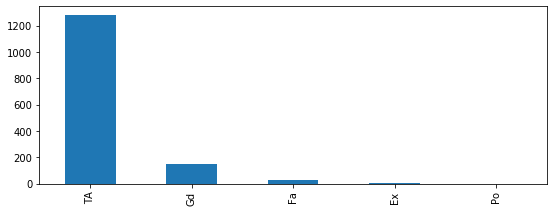

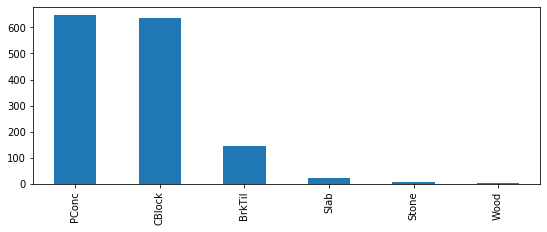

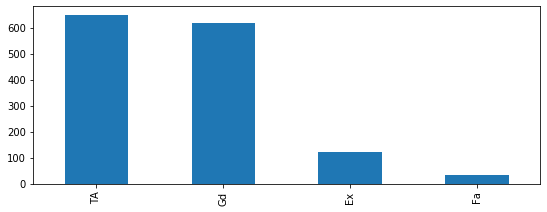

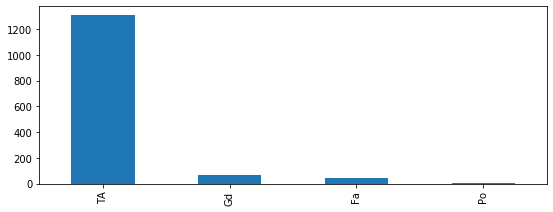

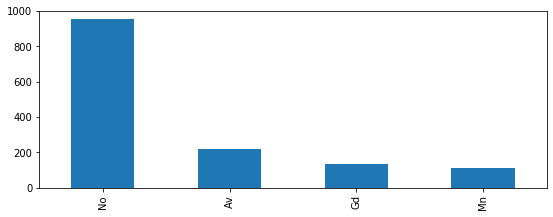

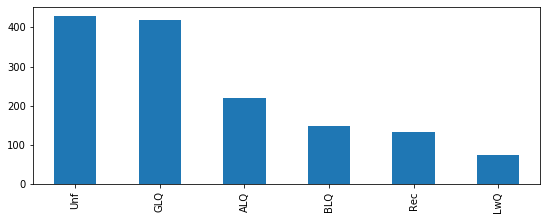

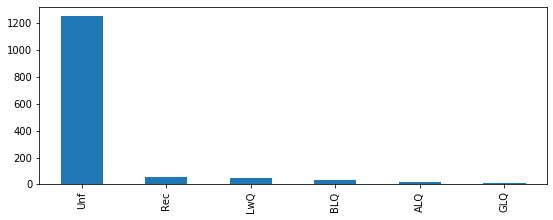

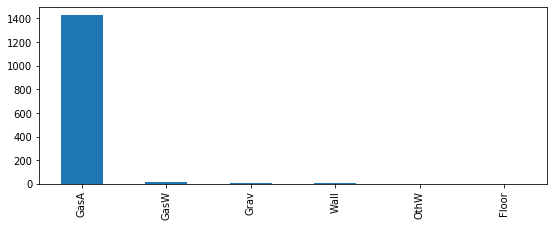

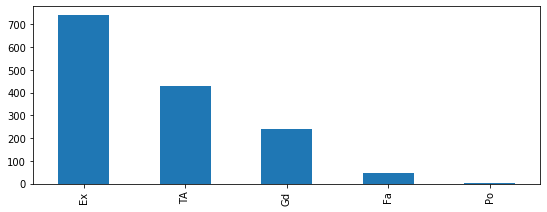

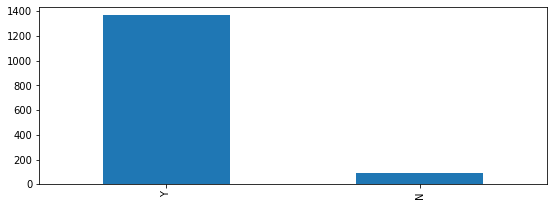

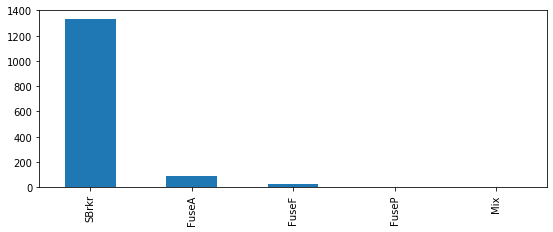

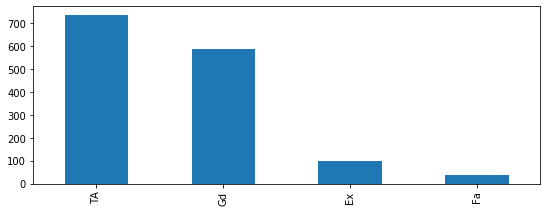

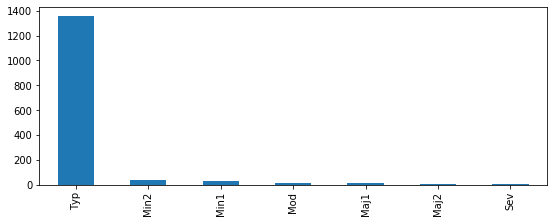

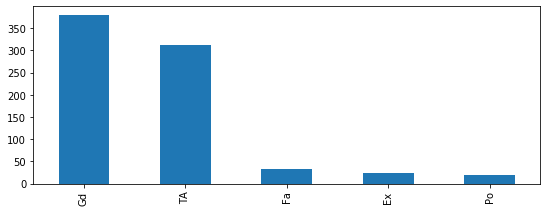

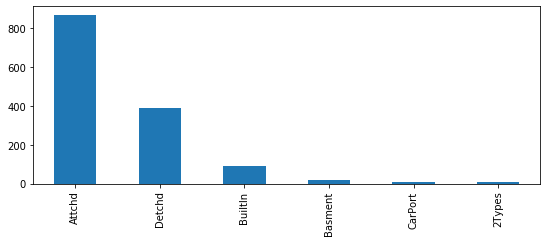

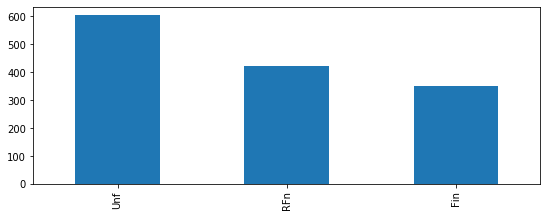

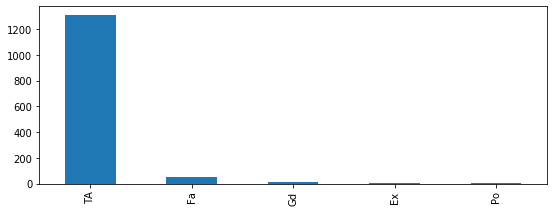

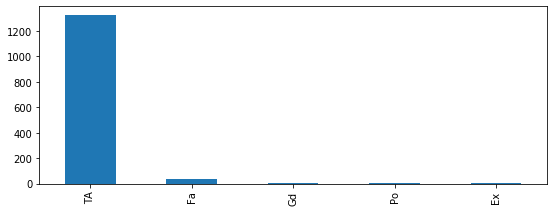

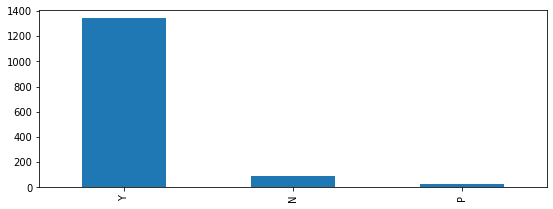

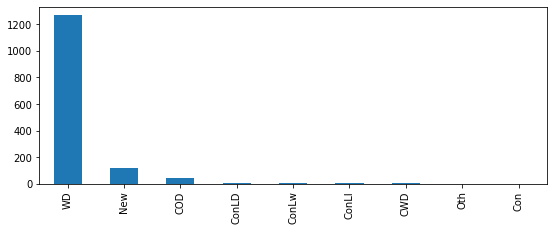

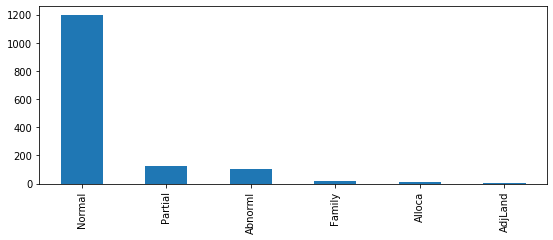

In [125]:
for col in cat_cols:
    plt.figure(figsize=(20, 15))
    plt.subplot(4,2,1)
    df[col].value_counts().plot(kind='bar')

In [126]:
rec_count = df.shape[0]
# Categorial columns value counts
info_db = []
value_counts_dict = {}
for col in cat_cols:
    # print(f"Value Counts for '{col}'")
    val_counts = df[col].value_counts()
    # display(val_counts)
    value_counts_dict[col] = pd.DataFrame({
        "Value": val_counts.index,
        "Count": val_counts.values,
        "Percent": round((val_counts*100)/rec_count, 2).values})
    null_count = df[col].isnull().sum()
    nulls_per = round((null_count*100)/rec_count, 2)
    info_db.append((col, len(val_counts), null_count, nulls_per))
    # print(f"Value Counts: {len(val_counts)}, Null Count: {null_count}, Null Percentage: {nulls_per}")
    # print("-"*50)

In [127]:
# Column , value count, null counts and null percent
pd.DataFrame(info_db, columns=["Column", "Value Type Count", "Null Count", "Null Percentage"]).sort_values(by=["Value Type Count", "Null Count"], ascending=False)


Column  Value Type Count  Null Count  Null Percentage
8    Neighborhood                25           0             0.00
18    Exterior2nd                16           0             0.00
0      MSSubClass                15           0             0.00
17    Exterior1st                15           0             0.00
13    OverallQual                10           0             0.00
9      Condition1                 9           0             0.00
14    OverallCond                 9           0             0.00
40       SaleType                 9           0             0.00
10     Condition2                 8           0             0.00
12     HouseStyle                 8           0             0.00
16       RoofMatl                 8           0             0.00
33     Functional                 7           0             0.00
35     GarageType                 6          81             5.55
27   BsmtFinType2                 6          38             2.60
26   BsmtFinType1                 6          37             2.53
15      RoofStyle                 6           0             0.00
22     Foundation                 6           0             0.00
28        Heating                 6           0             0.00
41  SaleCondition                 6           0             0.00
34    FireplaceQu                 5         690            47.26
37     GarageQual                 5          81             5.55
38     GarageCond                 5          81             5.55
31     Electrical                 5           1             0.07
1        MSZoning                 5           0             0.00
6       LotConfig                 5           0             0.00
11       BldgType                 5           0             0.00
21      ExterCond                 5           0             0.00
29      HeatingQC                 5           0             0.00
25   BsmtExposure                 4          38             2.60
23       BsmtQual                 4          37             2.53
24       BsmtCond                 4          37             2.53
19     MasVnrType                 4           8             0.55
3        LotShape                 4           0             0.00
4     LandContour                 4           0             0.00
20      ExterQual                 4           0             0.00
32    KitchenQual                 4           0             0.00
36   GarageFinish                 3          81             5.55
7       LandSlope                 3           0             0.00
39     PavedDrive                 3           0             0.00
2          Street                 2           0             0.00
5       Utilities                 2           0             0.00
30     CentralAir                 2           0             0.00

**For each categorical column if share value is less than 5% then put in other category**

In [128]:
# the below replacement_dict will be used in transformation of test set
replacement_dict = {}
for k, v in value_counts_dict.items():
    v["NewValue"] = v.apply(lambda r: r["Value"] if r["Percent"] > 5. else "Others", axis=1)
    val_dicts = {}
    for r in range(v.shape[0]):
        val_dicts[v.iloc[r]['Value']] = v.iloc[r]["NewValue"]

    replacement_dict[k] = val_dicts

In [129]:
# Replacing values
for k, v in replacement_dict.items():
    df[k] = df[k].replace(v)

In [130]:
df.sample(20)

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
867          20       RL         85.0     6970   Pave      Reg         Lvl   
1288        120       RL         40.0     5664   Pave      IR1         Lvl   
705      Others       RM         70.0     5600   Pave      Reg         Lvl   
1011     Others       RL         75.0     9825   Pave      Reg         Lvl   
1393     Others       RM         60.0    10800   Pave      Reg         Lvl   
510          20       RL         75.0    14559   Pave      Reg         Lvl   
1135     Others       RM         60.0     6180   Pave      Reg         Lvl   
1007     Others       RM         21.0     2217   Pave      Reg         Lvl   
972         120       RL         55.0     7892   Pave      Reg         Lvl   
617      Others       RL         59.0     7227   Pave      Reg      Others   
105          60   Others         75.0     9375   Pave      Reg         Lvl   
44           20       RL         70.0     7945   Pave      Reg         Lvl   
692          60       RL         42.0    26178   Pave      IR1         Lvl   
615      Others       RL         80.0     8800   Pave      Reg         Lvl   
529          20       RL          NaN    32668   Pave      IR1         Lvl   
889          20       RL        128.0    12160   Pave      Reg         Lvl   
340          60       RL         85.0    14191   Pave      Reg         Lvl   
1423     Others       RL          NaN    19690   Pave      IR1         Lvl   
777          20       RL        100.0    13350   Pave      IR1         Lvl   
396          20       RL         60.0     7200   Pave      Reg      Others   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
867     AllPub    Corner       Gtl       Sawyer      Feedr       Norm   
1288    AllPub    Inside       Gtl       Others       Norm       Norm   
705     AllPub    Inside       Gtl       Others       Norm       Norm   
1011    AllPub    Inside       Gtl      Edwards       Norm       Norm   
1393    AllPub    Inside       Gtl      OldTown       Norm       Norm   
510     AllPub    Inside       Gtl        NAmes       Norm       Norm   
1135    AllPub    Corner       Gtl       Others       Norm       Norm   
1007    AllPub    Inside       Gtl       Others       Norm       Norm   
972     AllPub    Inside       Gtl       Others       Norm       Norm   
617     AllPub    Corner    Others        NAmes     Others       Norm   
105     AllPub    Inside       Gtl      Somerst       Norm       Norm   
44      AllPub    Inside       Gtl        NAmes       Norm       Norm   
692     AllPub    Inside    Others       Others       Norm       Norm   
615     AllPub    Inside       Gtl        NAmes      Feedr       Norm   
529     AllPub   CulDSac       Gtl       Others       Norm       Norm   
889     AllPub    Inside       Gtl        NAmes      Feedr       Norm   
340     AllPub    Inside       Gtl       Others       Norm       Norm   
1423    AllPub   CulDSac       Gtl      Edwards       Norm       Norm   
777     AllPub    Inside       Gtl       Sawyer       Norm       Norm   
396     AllPub    Inside       Gtl      CollgCr       Norm       Norm   

     BldgType HouseStyle OverallQual OverallCond  YearBuilt  YearRemodAdd  \
867      1Fam     1Story           4           5       1961          1961   
1288   TwnhsE     1Story           8           5       2000          2000   
705    Others     2Story           4           5       1930          1950   
1011   Others     1Story           5           5       1965          1965   
1393   Others     1.5Fin           6           7       1905          2000   
510      1Fam     1Story           5           7       1951          2000   
1135     1Fam     1Story           6           5       1926          1950   
1007   TwnhsE     2Story           4      Others       1970          1970   
972    TwnhsE     1Story           6           5       1979          1979   
617      1Fam     Others           6           6       1954   

<h3>Imputing categorical columns</h3>

In [131]:
# Garage columns
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df[col].fillna('NO GARAGE', inplace=True)
df['GarageYrBlt'].fillna(0, inplace=True)

In [132]:
# Basement columns
for col in ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1', 'BsmtCond']:
    df[col].fillna('NO BASEMENT', inplace=True)

In [133]:
round((df.isna().sum()[df.isna().sum() > 0]/df.shape[0])*100, 2).sort_values(ascending=False)

FireplaceQu    47.26
LotFrontage    17.74
MasVnrArea      0.55
MasVnrType      0.55
Electrical      0.07
dtype: float64

In [134]:
df = df.drop([ "FireplaceQu"], axis='columns')

In [135]:
round((df.isna().sum()[df.isna().sum() > 0]/df.shape[0])*100, 2).sort_values(ascending=False)

LotFrontage    17.74
MasVnrArea      0.55
MasVnrType      0.55
Electrical      0.07
dtype: float64

<h3>We'll drop "MoSold" as well and use "YrSold" </h3>

In [136]:
df = df.drop(["MoSold"], axis='columns')

In [137]:
# Converting year columns to age columns
for age_col in age_cols:
    df[f'{age_col}_Old'] = df[age_col].max()-df[age_col]
    df.drop(age_col, axis=1, inplace=True)

In [138]:
#  value imputation's
df['MasVnrType'].fillna('None', inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=True)
df['BsmtQual'].fillna('TA', inplace=True)
df['BsmtCond'].fillna('TA', inplace=True)
df['BsmtExposure'].fillna('No', inplace=True)
df['BsmtFinType1'].fillna('Unf', inplace=True)
df['BsmtFinType2'].fillna('Unf', inplace=True)
df['GarageType'].fillna('Attchd', inplace=True)
df['GarageYrBlt_Old'].fillna(-1, inplace=True)
df['GarageFinish'].fillna('Unf', inplace=True)
df['GarageQual'].fillna('TA', inplace=True)
df['GarageCond'].fillna('TA', inplace=True)

<h2>Outliers treatment for numeric columns</h2>

In [139]:
df[num_cols].describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.95, 0.99]).T

count        mean        std      min        5%       10%  \
LotFrontage    1201.0      70.050     24.285     21.0     34.00      44.0   
LotArea        1460.0   10516.828   9981.265   1300.0   3311.70    5000.0   
BsmtFinSF2     1460.0      46.549    161.319      0.0      0.00       0.0   
BsmtUnfSF      1460.0     567.240    441.867      0.0      0.00      74.9   
TotalBsmtSF    1460.0    1057.429    438.705      0.0    519.30     636.9   
1stFlrSF       1460.0    1162.627    386.588    334.0    672.95     756.9   
2ndFlrSF       1460.0     346.992    436.528      0.0      0.00       0.0   
LowQualFinSF   1460.0       5.845     48.623      0.0      0.00       0.0   
GrLivArea      1460.0    1515.464    525.480    334.0    848.00     912.0   
WoodDeckSF     1460.0      94.245    125.339      0.0      0.00       0.0   
OpenPorchSF    1460.0      46.660     66.256      0.0      0.00       0.0   
EnclosedPorch  1460.0      21.954     61.119      0.0      0.00       0.0   
3SsnPorch      1460.0       3.410     29.317      0.0      0.00       0.0   
ScreenPorch    1460.0      15.061     55.757      0.0      0.00       0.0   
PoolArea       1460.0       2.759     40.177      0.0      0.00       0.0   
SalePrice      1460.0  180921.196  79442.503  34900.0  88000.00  106475.0   

                     25%       50%        75%        95%        99%       max  
LotFrontage        59.00      69.0      80.00     107.00     141.00     313.0  
LotArea          7553.50    9478.5   11601.50   17401.15   37567.64  215245.0  
BsmtFinSF2          0.00       0.0       0.00     396.20     830.38    1474.0  
BsmtUnfSF         223.00     477.5     808.00    1468.00    1797.05    2336.0  
TotalBsmtSF       795.75     991.5    1298.25    1753.00    2155.05    6110.0  
1stFlrSF          882.00    1087.0    1391.25    1831.25    2219.46    4692.0  
2ndFlrSF            0.00       0.0     728.00    1141.05    1418.92    2065.0  
LowQualFinSF        0.00       0.0       0.00       0.00     360.00     572.0  
GrLivArea        1129.50    1464.0    1776.75    2466.10    3123.48    5642.0  
WoodDeckSF          0.00       0.0     168.00     335.00     505.46     857.0  
OpenPorchSF         0.00      25.0      68.00     175.05     285.82     547.0  
EnclosedPorch       0.00       0.0       0.00     180.15     261.05     552.0  
3SsnPorch           0.00       0.0       0.00       0.00     168.00     508.0  
ScreenPorch         0.00       0.0       0.00     160.00     268.05     480.0  
PoolArea            0.00       0.0       0.00       0.00       0.00     738.0  
SalePrice      129975.00  163000.0  214000.00  326100.00  442567.01  755000.0

In [140]:
# Removing outliers


def remove_outlier_data(x):
    list = []
    for col in num_cols:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x = x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))]
    return x


df = remove_outlier_data(df)

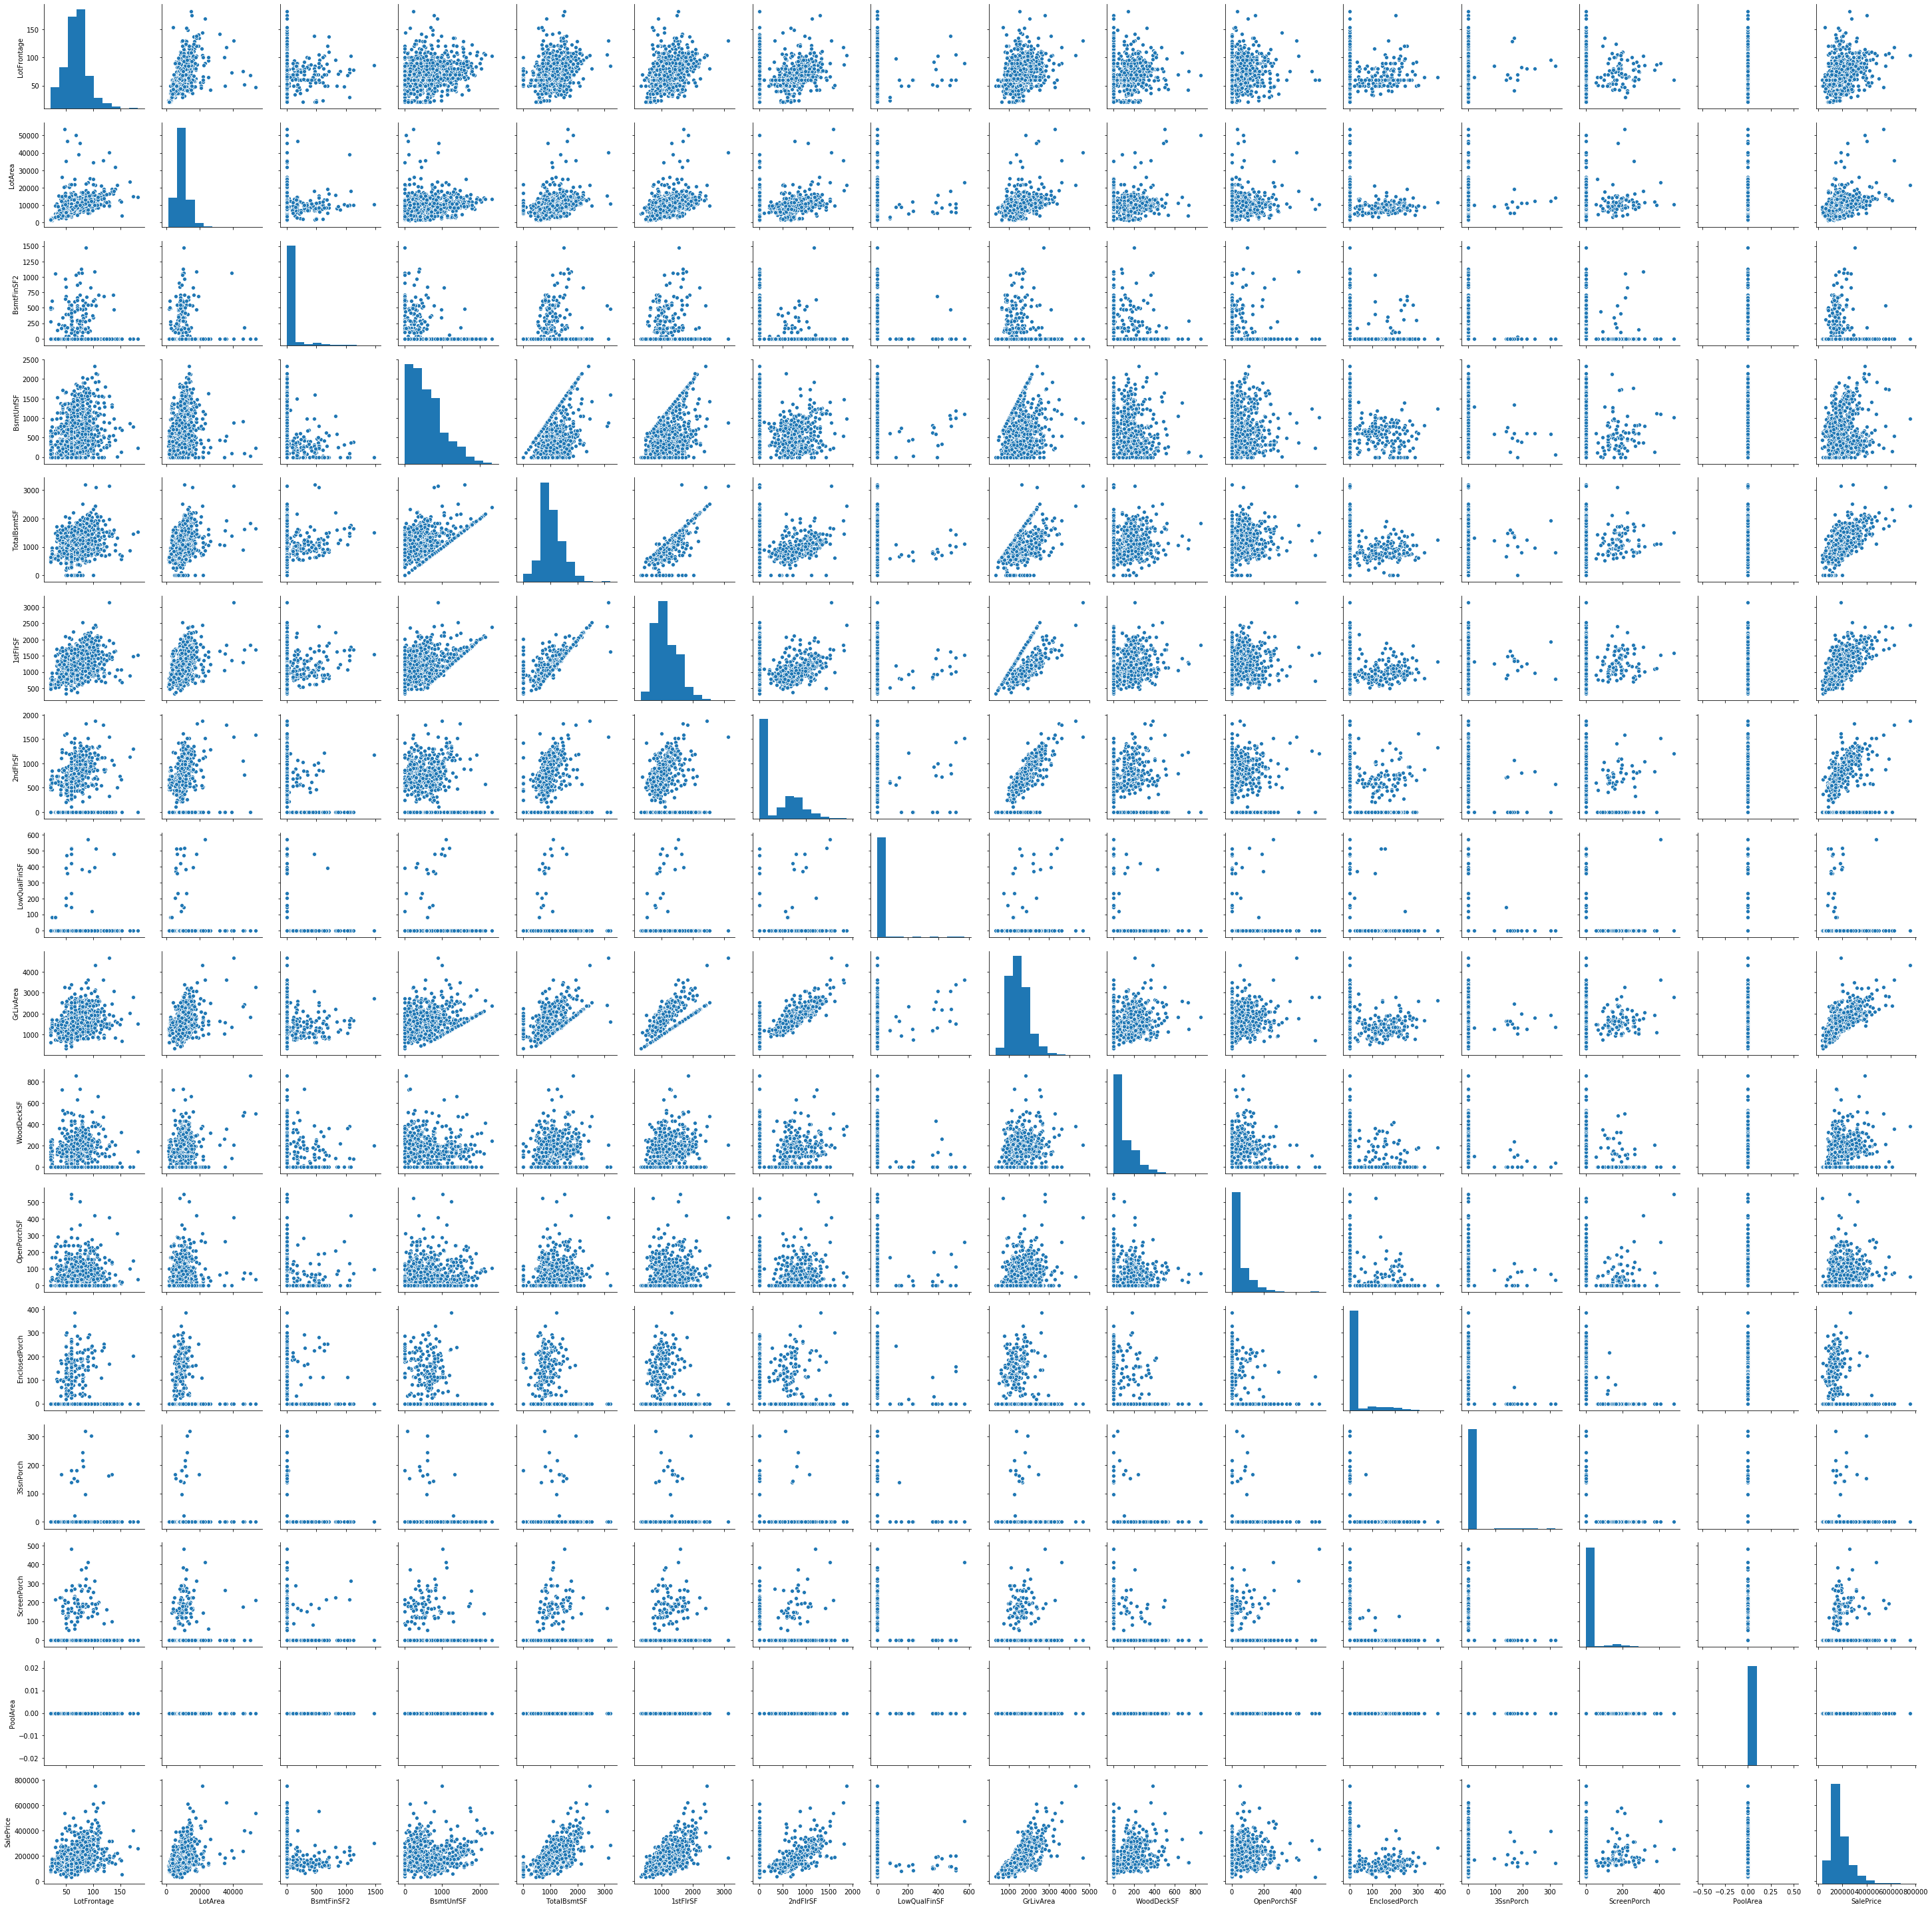

In [141]:
sns.pairplot(df[num_cols])
plt.show()

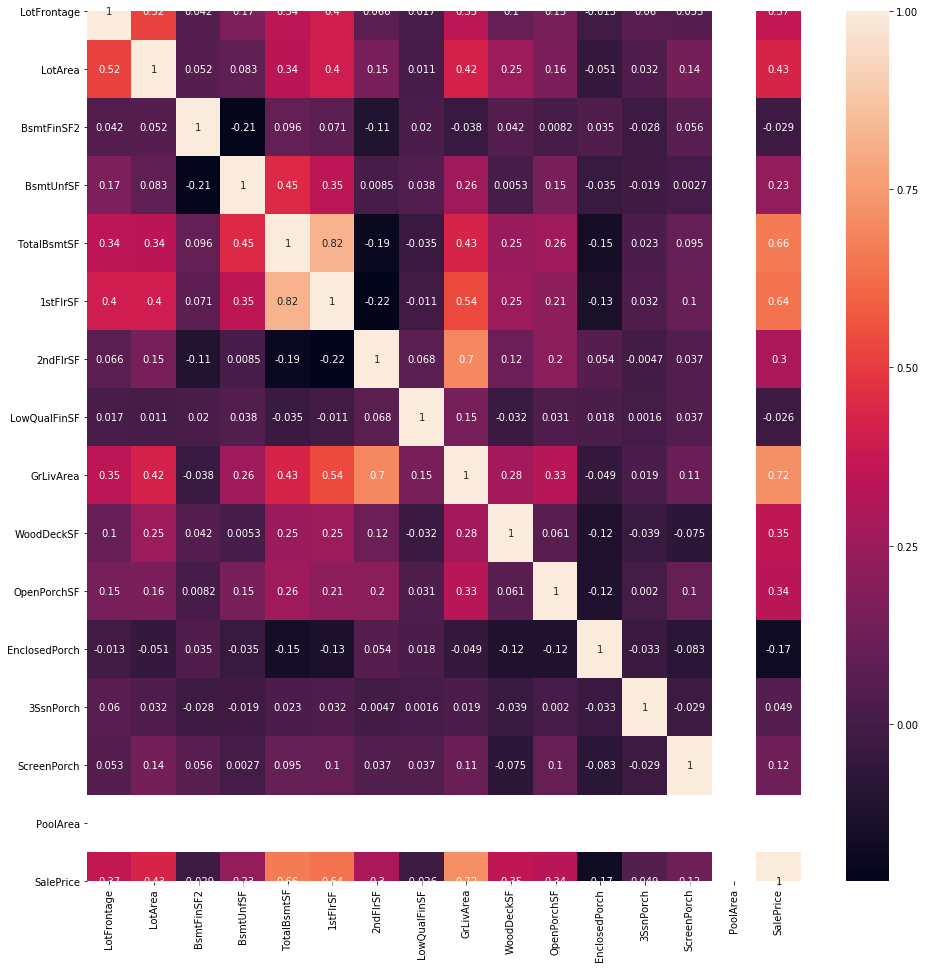

In [143]:
# Correlation plot
plt.figure(figsize=(16, 16))
sns.heatmap(df[num_cols].corr(), annot=True)
plt.show()

<h2>Get dummies for categorical columns</h2>

In [144]:
# Need to do because we have dropped many categorical columns

cat_cols = list(set(cat_cols).intersection(set(df.columns)))

In [145]:
dummies = pd.get_dummies(df[cat_cols], drop_first=True)
df = pd.concat([df, dummies], axis=1)
df = df.drop(cat_cols, axis=1)

In [146]:
df.shape

(1190, 141)

In [147]:
df.sample(10)

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
1421         53.0     4043         0.0         360           0        709   
653          60.0    10320         0.0           0           0        756   
1458         68.0     9717         0.0          49        1029          0   
602          80.0    10041         0.0         789           0        119   
40           84.0     8658       101.0         643           0        445   
1165         79.0     9541       268.0           0           0       1502   
634          64.0     6979         0.0        1056           0          0   
1056         43.0     7052       240.0         659           0        705   
724          86.0    13286       340.0        1234           0        464   
1428         60.0     7200       294.0         510           0        278   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
1421         1069      1069         0             0       1069             0   
653           756       756       713             0       1469             0   
1458         1078      1078         0             0       1078             1   
602           908       927       988             0       1915             1   
40           1088      1324         0             0       1324             0   
1165         1502      1502         0             0       1502             0   
634          1056      1056         0             0       1056             2   
1056         1364      1364         0             0       1364             1   
724          1698      1698         0             0       1698             1   
1428          788       804         0             0        804             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
1421             0         2         0             2             1   
653              0         1         0             3             1   
1458             0         1         0             2             1   
602              0         2         1             3             1   
40               0         2         0             3             1   
1165             0         2         0             3             1   
634              0         0         0             0             2   
1056             0         2         0             2             1   
724              0         2         0             3             1   
1428             0         1         0             2             1   

      TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
1421             4           1           2         440           0   
653              7           0           1         216          57   
1458             5           0           1         240         366   
602              8           1           2         506         120   
40               6           1           2         440           0   
1165             7           0           2         644           0   
634              4           0           2         576         264   
1056             6           1           2         484         192   
724              8           1           3         768         327   
1428             4           2           1         240           0   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
1421           55              0          0          165         0        0   
653             0            239          0            0         0        0   
1458            0            112          0            0         0        0   
602           150              0          0            0         0        0   
40            138              0          0            0         0        0   
1165          114              0          0            0         0        0   
634            56              0          0            0         0      600   
1056           36              0          0            0         0        0   
724            64       

<h2>Split the data</h2>

In [148]:
df_train, df_test = train_test_split(df, train_size=0.8, test_size=0.2, random_state=42)

In [149]:
num_col = list(set(num_cols).intersection(set(df.columns)))

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

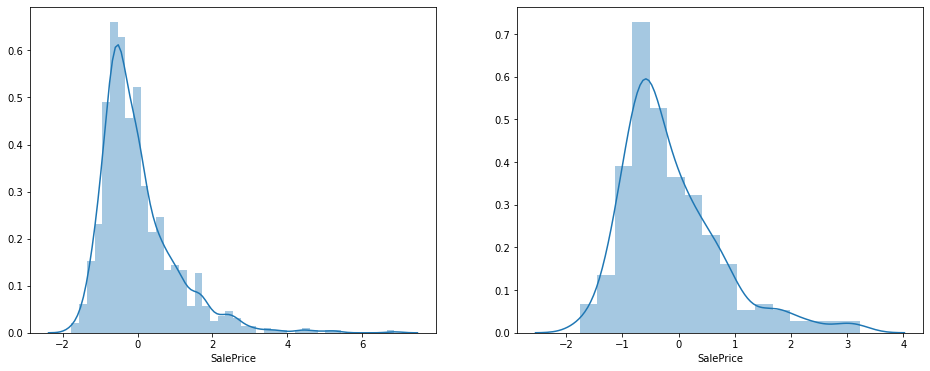

In [150]:
plt.figure(figsize=(16, 6))
plt.subplot(121)
sns.distplot(df_train['SalePrice'])
plt.subplot(122)
sns.distplot(df_test['SalePrice'])
plt.show()

<h3>Extract Target column</h3>

In [151]:
y_train = df_train.pop('SalePrice')
X_train = df_train
y_test = df_test.pop('SalePrice')
X_test = df_test

<h3>Lets use RFECV for automatic  feature elemination</h3>

In [152]:
def feature_selector(feature_selector_obj, train_data: pd.DataFrame, train_target: pd.DataFrame):
    selector = feature_selector_obj.fit(train_data, train_target)
    display(selector.support_)
    print(f"Total selected features: {selector.support_.sum()}")
    print(
        f"Selected feature Names: {list(train_data.columns[selector.support_])}")
    display(selector.ranking_)
    return selector

In [153]:
# get RFECV selector
rfe_selector = feature_selector(RFECV(LinearRegression(), step=1, cv=5), X_train, y_train)

array([ True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

Total selected features: 134
Selected feature Names: ['LotFrontage', 'LotArea', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', '3SsnPorch', 'ScreenPorch', 'YearBuilt_Old', 'YearRemodAdd_Old', 'GarageYrBlt_Old', 'YrSold_Old', 'RoofStyle_Hip', 'RoofStyle_Others', 'OverallQual_5.0', 'OverallQual_6.0', 'OverallQual_7.0', 'OverallQual_8.0', 'OverallQual_Others', 'CentralAir_Y', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_NO BASEMENT', 'BsmtFinType1_Rec', 'BsmtFinType1_Unf', 'HeatingQC_Gd', 'HeatingQC_Others', 'HeatingQC_TA', 'HouseStyle_1Story', 'HouseStyle_2Story', 'HouseStyle_Others', 'SaleType_Others', 'SaleType_WD', 'Street_Pave', 'Functional_Typ', 'Heating_Others', 'OverallCond_6.0', 'OverallCond_7.0', 'OverallCond_Others', 'RoofMatl_Others', 'MSSubCl

array([1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1,
       1, 4, 1, 1, 7, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [154]:
# get only usefull columns from train and test
rfe_sel_columns = list(X_train.columns[rfe_selector.support_])
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

<h3>Lets try lasso</h3>

In [155]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = lasso.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8964403153351785
0.8987078446733796


In [156]:
# print Lasso coefficients
model_parameter = list(lasso.coef_)
model_parameter.insert(0, lasso.intercept_)
model_parameter = [round(x, 3) for x in model_parameter]
col = df_train.columns
col.insert(0, 'Constant')
list(zip(col, model_parameter))

[('LotFrontage', -0.297),
 ('LotArea', 0.023),
 ('MasVnrArea', 0.032),
 ('BsmtFinSF1', -0.015),
 ('BsmtFinSF2', -0.081),
 ('BsmtUnfSF', 0.203),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.075),
 ('2ndFlrSF', -0.016),
 ('LowQualFinSF', 0.299),
 ('GrLivArea', 0.028),
 ('BsmtFullBath', 0.011),
 ('BsmtHalfBath', 0.083),
 ('FullBath', 0.028),
 ('HalfBath', -0.045),
 ('BedroomAbvGr', -0.24),
 ('KitchenAbvGr', 0.024),
 ('TotRmsAbvGrd', 0.084),
 ('Fireplaces', 0.092),
 ('GarageCars', 0.02),
 ('GarageArea', -0.017),
 ('WoodDeckSF', 0.007),
 ('OpenPorchSF', 0.037),
 ('EnclosedPorch', -0.002),
 ('3SsnPorch', -0.003),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('MiscVal', -0.0),
 ('YearBuilt_Old', -0.066),
 ('YearRemodAdd_Old', -0.004),
 ('GarageYrBlt_Old', -0.047),
 ('YrSold_Old', 0.0),
 ('RoofStyle_Hip', 0.226),
 ('RoofStyle_Others', 0.446),
 ('OverallQual_5.0', 0.093),
 ('OverallQual_6.0', -0.007),
 ('OverallQual_7.0', 0.053),
 ('OverallQual_8.0', -0.002),
 ('OverallQual_Others', 0.0),
 ('CentralAi

<h3>Lets used Grid Search CV for Lasso to get best model</h3>

In [157]:
#  Grid search CV for Lasso
lasso = Lasso()
params = {'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]}
folds = KFold(n_splits=10, shuffle=True, random_state=42)
cv_model = GridSearchCV(estimator=lasso, param_grid=params, scoring='r2',
                        cv=folds, return_train_score=True, verbose=1)
cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    1.8s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [158]:
cv_result = pd.DataFrame(cv_model.cv_results_)
cv_result['param_alpha'] = cv_result['param_alpha'].astype('float32')
cv_result

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0          0.076     1.918e-02            0.003       8.010e-04        0.001   
1          0.025     3.838e-03            0.008       5.235e-03        0.010   
2          0.013     6.355e-03            0.004       1.988e-03        0.100   
3          0.007     6.670e-04            0.002       5.634e-04        1.000   
4          0.007     9.122e-04            0.002       5.473e-04        5.000   
5          0.007     2.082e-03            0.002       4.884e-04       10.000   
6          0.007     1.569e-03            0.002       7.755e-04       20.000   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}              0.867              0.915              0.907   
1   {'alpha': 0.01}              0.838              0.903              0.892   
2    {'alpha': 0.1}              0.714              0.778              0.823   
3    {'alpha': 1.0}              0.338              0.463              0.499   
4    {'alpha': 5.0}              0.367              0.400              0.437   
5   {'alpha': 10.0}              0.281              0.253              0.308   
6   {'alpha': 20.0}              0.112              0.091              0.153   

   split3_test_score  split4_test_score  split5_test_score  split6_test_score  \
0              0.892              0.596              0.860              0.902   
1              0.862              0.613              0.832              0.883   
2              0.710              0.595              0.708              0.765   
3              0.342              0.254              0.384              0.225   
4              0.352              0.174              0.312              0.186   
5              0.205              0.090              0.181              0.145   
6             -0.039             -0.013              0.034              0.068   

   split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0              0.885              0.887              0.861            0.857   
1              0.877              0.849              0.863            0.841   
2              0.771              0.719              0.751            0.733   
3              0.430              0.270              0.323            0.353   
4              0.341              0.219              0.246            0.304   
5              0.210              0.129              0.137            0.194   
6              0.068              0.034              0.019            0.053   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0           0.089                1               0.897               0.895   
1           0.079                2               0.862               0.857   
2           0.058                3               0.749               0.741   
3           0.086                4               0.364               0.351   
4           0.087                5               0.312               0.295   
5           0.067                6               0.206               0.187   
6           0.055                7               0.073               0.072   

   split2_train_score  split3_train_score  split4_train_score  \
0               0.894               0.896               0.926   
1               0.859               0.861               0.894   
2               0.737               0.750               0.773   
3               0.348               0.362               0.371   
4               0.293               0.309               0.313   
5               0.190               0.204               0.210   
6               0.063               0.077               0.079   

   split5_train_score  split6_train_score  split7_train_score  \
0               0.899               0.893               0.897   
1               0.861               0.858               0.859   
2               0.748               0.740               0.743   
3               0.359            

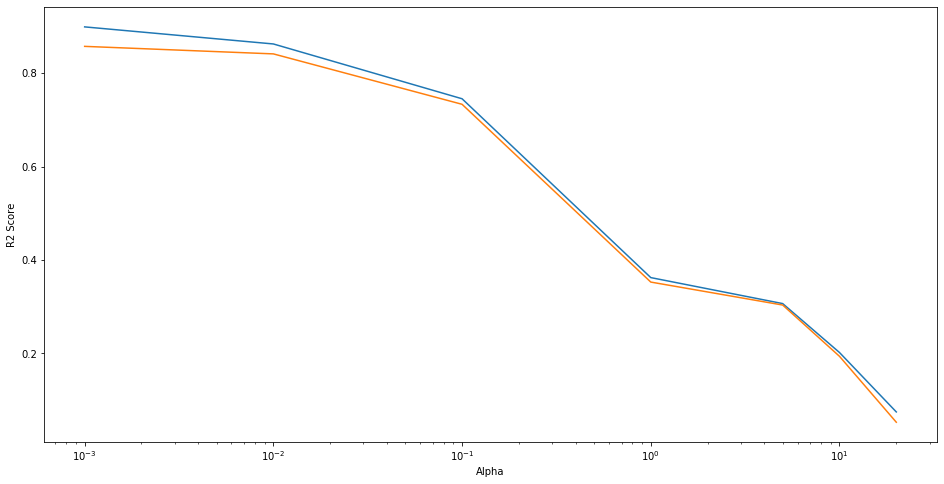

In [159]:
#  plotting train and test errors
plt.figure(figsize=(16, 8))
plt.plot(cv_result['param_alpha'], cv_result['mean_train_score'])
plt.plot(cv_result['param_alpha'], cv_result['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [160]:
# best alpha
cv_model.best_params_

{'alpha': 0.001}

In [161]:
#  train model with best alpha

lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8964403153351785
0.8987078446733796


In [162]:
#  find lasso params
model_param = list(lasso.coef_)
model_param.insert(0, lasso.intercept_)
cols = df_train.columns
cols.insert(0, 'const')
lasso_coef = pd.DataFrame(list(zip(cols, model_param)))
lasso_coef.columns = ['Feature Name', 'Coefficient Value']

<h2>Best (TOP 15) Lasso params</h2>

In [163]:
lasso_coef.sort_values(by='Coefficient Value', ascending=False).head(15).style.hide_index()

<h2>Ridge Regression</h2>

In [164]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train, y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train, y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test, y_test_pred))


0.8998639563838468
0.8913148619005389


Good R-square values

In [165]:
#  Grid search CV for Ridge
ridge = Ridge()
params = {'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]}
folds = KFold(n_splits=10, shuffle=True, random_state=42)
cv_model = GridSearchCV(estimator=ridge, param_grid=params, scoring='r2',
                        cv=folds, return_train_score=True, verbose=1)
cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.8s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [166]:
r_cv_result = pd.DataFrame(cv_model.cv_results_)
r_cv_result['param_alpha'] = r_cv_result['param_alpha'].astype('float32')
r_cv_result.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0          0.010         0.009            0.002       4.673e-04        0.001   
1          0.007         0.002            0.002       6.267e-04        0.010   
2          0.008         0.008            0.002       4.646e-04        0.100   
3          0.009         0.006            0.003       3.877e-03        1.000   
4          0.007         0.002            0.002       6.615e-04        5.000   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}              0.859              0.905              0.898   
1   {'alpha': 0.01}              0.859              0.905              0.898   
2    {'alpha': 0.1}              0.859              0.905              0.899   
3    {'alpha': 1.0}              0.863              0.908              0.906   
4    {'alpha': 5.0}              0.868              0.915              0.912   

   split3_test_score  split4_test_score  split5_test_score  split6_test_score  \
0              0.874              0.589              0.832              0.904   
1              0.875              0.589              0.832              0.904   
2              0.877              0.591              0.837              0.904   
3              0.881              0.596              0.850              0.903   
4              0.888              0.606              0.859              0.900   

   split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0              0.872              0.884              0.854            0.847   
1              0.872              0.884              0.854            0.847   
2              0.872              0.884              0.856            0.848   
3              0.876              0.885              0.861            0.853   
4              0.884              0.887              0.866            0.858   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0           0.089                7               0.901               0.898   
1           0.089                6               0.901               0.898   
2           0.088                5               0.901               0.898   
3           0.087                4               0.900               0.897   
4           0.086                3               0.898               0.895   

   split2_train_score  split3_train_score  split4_train_score  \
0               0.898               0.900               0.930   
1               0.898               0.900               0.930   
2               0.898               0.900               0.930   
3               0.897               0.899               0.929   
4               0.895               0.897               0.928   

   split5_train_score  split6_train_score  split7_train_score  \
0               0.904               0.897               0.900   
1               0.904               0.897               0.900   
2               0.903               0.897               0.900   
3               0.902               0.897               0.900   
4               0.900               0.895               0.898   

   split8_train_score  split9_train_score  mean_train_score  std_train_score  
0               0.898               0.902             0.903            0.009  
1               0.898               0.902             0.903            0.009  
2               0.898               0.902             0.903            0.009  
3               0.897               0.901             0.902            0.009  
4               0.895               0.899             0.900            0.009

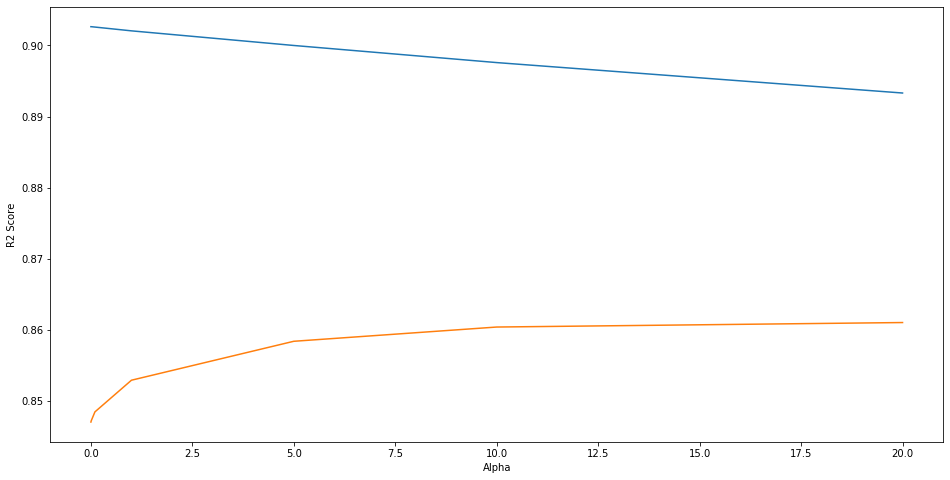

In [167]:
#  plotting train and test errors
plt.figure(figsize=(16, 8))
plt.plot(r_cv_result['param_alpha'], r_cv_result['mean_train_score'])
plt.plot(r_cv_result['param_alpha'], r_cv_result['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

In [168]:
# best alpha
cv_model.best_params_

{'alpha': 20.0}

In [169]:
#  train model with best alpha

ridge = Ridge(alpha=20.0)
ridge.fit(X_train, y_train)

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8918562609452879
0.9026325970835328


In [170]:
#  find ridge params
model_param = list(ridge.coef_)
model_param.insert(0, ridge.intercept_)
cols = df_train.columns
cols.insert(0, 'const')
ridge_coef = pd.DataFrame(list(zip(cols, model_param)))
ridge_coef.columns = ['Feature Name', 'Coefficient Value']

<h2>Best (TOP 15) Ridge params</h2>

In [171]:
ridge_coef.sort_values(by='Coefficient Value', ascending=False).head(15).style.hide_index()

<h4>We can see that R-Squared are almost same (little better in ridge 0.903 > 0.899) but Lasso has advantage of being simpler model. So here I am going to choose <b>Lasso</b> over Ridge</h4>

<h4>Model for this analysis</h4>

In [172]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8964403153351785
0.8987078446733796


<h2>With doubling of alpha</h2>

With Lasso

In [173]:
#  train model with best alpha

lasso = Lasso(alpha=0.002)
lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8911521049559566
0.8996605425007069


In [174]:
#  find lasso params
model_param = list(lasso.coef_)
model_param.insert(0, lasso.intercept_)
cols = df_train.columns
cols.insert(0, 'const')
lasso_coef = pd.DataFrame(list(zip(cols, model_param)))
lasso_coef.columns = ['Feature Name', 'Coefficient Value']

In [175]:
lasso_coef.sort_values(by='Coefficient Value', ascending=False).head(15).style.hide_index()

With Ridge

In [176]:
ridge = Ridge(alpha=40.0)
ridge.fit(X_train, y_train)

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.885430397624369
0.9026750561898644


In [177]:
#  find ridge params
model_param = list(ridge.coef_)
model_param.insert(0, ridge.intercept_)
cols = df_train.columns
cols.insert(0, 'const')
ridge_coef = pd.DataFrame(list(zip(cols, model_param)))
ridge_coef.columns = ['Feature Name', 'Coefficient Value']

In [178]:
ridge_coef.sort_values(by='Coefficient Value', ascending=False).head(15).style.hide_index()


## Remove Top 5 features and then get top parameter

**For Lasso**

In [179]:
top_lasso_featutes = ["YrSold_Old", "LowQualFinSF", "GarageCond_Others", "GarageYrBlt_Old", "Exterior1st_Others"]

X_train_dropped = X_train.drop(top_lasso_featutes, axis=1)
X_test_dropped = X_test.drop(top_lasso_featutes, axis=1)

In [180]:
#  train model with best alpha

lasso = Lasso(alpha=0.001)
lasso.fit(X_train_dropped, y_train)

y_train_pred = lasso.predict(X_train_dropped)
y_test_pred = lasso.predict(X_test_dropped)

print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8960407446579666
0.8969904637280189


In [181]:
#  find lasso params
model_param = list(lasso.coef_)
model_param.insert(0, lasso.intercept_)
cols = X_train_dropped.columns
cols.insert(0, 'const')
lasso_coef = pd.DataFrame(list(zip(cols, model_param)))
lasso_coef.columns = ['Feature Name', 'Coefficient Value']

In [182]:
lasso_coef.sort_values(by='Coefficient Value', ascending=False).head(15).style.hide_index()

**For Ridge**

In [183]:
top_ridge_featutes = ["YrSold_Old", "BsmtUnfSF", "LowQualFinSF", "GarageQual_Others", "Neighborhood_NridgHt"]
X_train_dropped = X_train.drop(top_ridge_featutes, axis=1)
X_test_dropped = X_test.drop(top_ridge_featutes, axis=1)

In [184]:
ridge = Ridge(alpha=20.0)
ridge.fit(X_train_dropped, y_train)

y_train_pred = ridge.predict(X_train_dropped)
y_test_pred = ridge.predict(X_test_dropped)

print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8887654474161133
0.8976115789075152


In [185]:
#  find ridge params
model_param = list(ridge.coef_)
model_param.insert(0, ridge.intercept_)
cols = X_train_dropped.columns
cols.insert(0, 'const')
ridge_coef = pd.DataFrame(list(zip(cols, model_param)))
ridge_coef.columns = ['Feature Name', 'Coefficient Value']

In [186]:
ridge_coef.sort_values(by='Coefficient Value', ascending=False).head(15).style.hide_index()
